# Complex Numbers

Coomplex numbers are also a cental component to quantum mechanics, where they are used in the equations for wave functions and operators.

## 6.1 The complex plane

### Example 6.1: Properties of complex numbers

In [1]:
import cmath as cm

z = 3+4j
zconj = z.conjugate()
print(zconj)
print(z.imag)
print(z.real)

(3-4j)
4.0
3.0


In [2]:
print('magnitude or modulus ',abs(z))
print('phase ', cm.phase(z))

magnitude or modulus  5.0
phase  0.9272952180016122


In [3]:
print('Polar form (r, theta) = ', cm.polar(z))

Polar form (r, theta) =  (5.0, 0.9272952180016122)


In [6]:
print('Catersian form = ', cm.rect(5.0, 0.9272952180016122))

Catersian form =  (3.0000000000000004+3.9999999999999996j)


### Example 6.2: Plotting complex numbers in the xy-plane

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


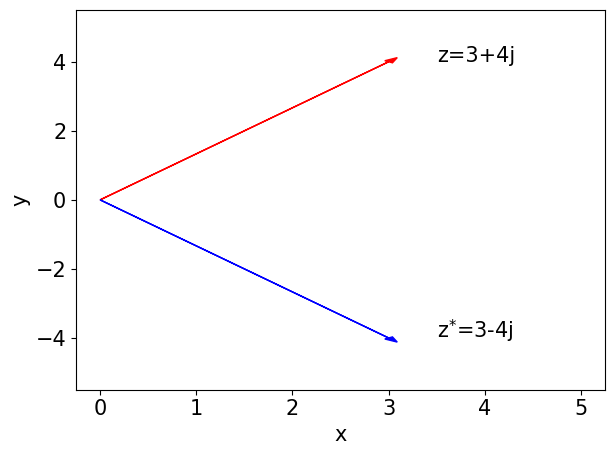

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["font.size"] = 15
z = 3+4j
zconj = z.conjugate()

# define scale of plot, and plot arrows and text
plt.scatter([0, 5], [-5,5], s=0)
plt.arrow(0, 0, z.real, z.imag, color='red', head_width=0.1)
plt.arrow(0, 0, zconj.real, zconj.imag, color='blue', head_width=0.1)

plt.xlabel('x')
plt.ylabel('y')
plt.text(3.5, 4, 'z=3+4j')
plt.text(3.5, -4, 'z$^{*}$=3-4j')

plt.tight_layout()
plt.show()

## 6.2 Trigonometric functions and complex exponentials

### Example 6.3: The complex exponential and simple harmonic motion

In [10]:
from sympy import symbols, exp, diff, I
A1, A2, omeg, k, m, t = symbols('A1, A2, omeg, k, m, t', real=True)

f = A1*exp(I*omeg*t)+A2*exp(-I*omeg*t)

secondDeriv = diff(f, t, t)
print(secondDeriv)
print(secondDeriv == -omeg**2*f)

-omeg**2*(A1*exp(I*omeg*t) + A2*exp(-I*omeg*t))
True


### Example 6.4: Symbolic addition of complex wavefunctions

In [13]:
from sympy import symbols, exp, Abs, sin, I, simplify
import textwrap

psi1, psi2, E1, E2, t = symbols('psi1, pis2, E1, E2, t '\
,real=True)

psi = psi1*exp(-I*E1*t) + psi2*exp(-I*E2*t)

psisq = Abs(psi)**2

print("psi^2 complex exponentials = ")
print(textwrap.fill(str(psisq), 80))

psi^2 complex exponentials = 
pis2**2 + pis2*psi1*exp(I*E1*t)*exp(-I*E2*t) +
pis2*psi1*exp(-I*E1*t)*exp(I*E2*t) + psi1**2


In [14]:
u = psisq.rewrite(sin)
print(simplify(u))

pis2**2 + 2*pis2*psi1*cos(t*(E1 - E2)) + psi1**2


### Example 6.5: Beat waves

In [15]:
from sympy import symbols, exp, sin, I, re, simplify, lambdify
import numpy as np
import matplotlib.pyplot as plt
a, b, t, x = symbols('a, b, t, x', real=True)

# f = sum of complex exponentials
f = exp(-I*t)*exp(I*x)+exp(-1.1*I*t)*exp(1.2*I*x)

# transform f from complex exponentials to sine, cosine functions
u = re(f.rewrite(sin))
print(simplify(u))

cos(t - x) + cos(1.1*t - 1.2*x)


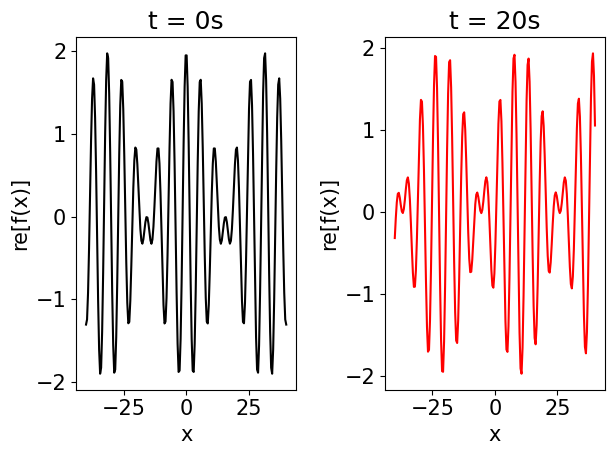

In [24]:
tot = lambdify([t,x], u)
xpos = np.linspace(-40, 40, 200)

# two plots at time t=0 s and t=20s
plt.subplot(1,2,1)
plt.plot(xpos, tot(0, xpos), 'k')

plt.xlabel('x')
plt.ylabel('re[f(x)]')
plt.title('t = 0s')

plt.subplot(1,2,2)
plt.plot(xpos, tot(20, xpos), 'r')
plt.xlabel('x')
plt.ylabel('re[f(x)]')
plt.title('t = 20s')

plt.tight_layout()
# plt.legend()
# leg = 
# leg().get_frame().set_hatch_linewidth(0.0)
plt.show()


## 6.3 Arithmetic with complex numbers

### Example 6.6: Probabilities of quantum states

In [25]:
import numpy as np
z0 = (2+3j)/np.sqrt(18)
z3 = (1-2j)/np.sqrt(18)

print(round(abs(z0)**2, 2))
print(round(abs(z3)**2, 2))

0.72
0.28


## 6.4 Application of complex numbers in ac circuits

In electronics and electical engineering, the treatment of resistors, capacitors, and inductors can be unified by introducing a single compelx number called the impedance Z.

### Example 6.7: Current and voltage in an inductor AC circuit

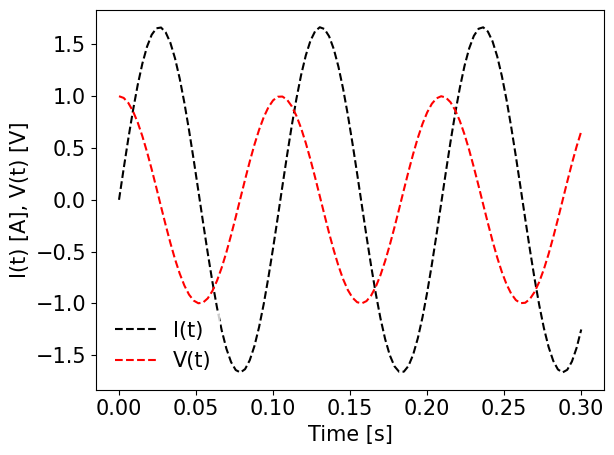

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sympy.utilities.lambdify import lambdify
from sympy import symbols, I, exp, re

L, V, i, omeg, Vo, theta1, t = symbols('L, V, i, omeg, Vo, \
theta1, t ', positive=True)

Z = I * omeg * L  # complex impedance for inductor
V = Vo * exp(I*(omeg*t+theta1))  # input voltage V
i = V/Z  # Ohm's law for inductor

tims = np.linspace(0, 0.3, 100)

i1 = lambdify(t, re(i.subs({Vo:1, omeg:60, theta1:0, L:0.01})))
v1 = lambdify(t, re(V.subs({Vo:1, omeg:60, theta1:0, L:0.01})))

plt.plot(tims, i1(tims), 'k--', label='I(t)')
plt.plot(tims, v1(tims), 'r--', label='V(t)')
plt.xlabel('Time [s]')
plt.ylabel('I(t) [A], V(t) [V]')

leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.tight_layout()
plt.show()

### Example 6.8: Impedance in series RLC circuit

In [38]:
from sympy import symbols, Abs, im, I, re
R, L, C, omeg = symbols('R, L, C, omeg', real=True)
Z = R + I * (omeg*L-1/(omeg*C))  # complex impedence

print(Abs(Z))
# print('tan(phi)', z.imag/z.real)
print('tan(phi) = ', im(Z)/re(Z))

sqrt(L**2*omeg**2 + R**2 - 2*L/C + 1/(C**2*omeg**2))
tan(phi) =  (L*omeg - 1/(C*omeg))/R


## 6.5 Equations with complex numbers

### Example 6.9: Solving an equation of complex variables

In [40]:
from sympy import symbols, solve, I

x, y = symbols('x, y', real=True)
sol = solve((x+I*y)**2-2*I*x, [x,y])  # solve equation for (x, y)
print('Possible solutions are the pairs (x, y):\n', sol)

Possible solutions are the pairs (x, y):
 [(-1, 1), (0, 0), (1, 1)]


## Example 6.10: Solutions of the externally driven damped harmonic oscillator

In [41]:
from sympy import symbols, exp, diff, simplify, I, re, im, solve

x, t, omeg, omeg0, A, phi, gam, D = symbols(\
'x, t, omeg, omeg0, A, phi, gam, D', positive=True)

x = A * exp(I*omeg*t-I*phi)

# ODE for driven SHO
eq = diff(x, t, t)+2*gam*diff(x,t)+omeg0**2*x-D*exp(I*omeg*t)

# divide equation by trial function
ans = simplify(eq/exp(I*omeg*t-I*phi))
print('SHO Equation = ', ans)
print('The first equation is ', re(ans), ' = 0')
print('The second equation is ', im(ans), ' = 0')

SHO Equation =  2*I*A*gam*omeg - A*omeg**2 + A*omeg0**2 - D*exp(I*phi)
The first equation is  -A*omeg**2 + A*omeg0**2 - D*cos(phi)  = 0
The second equation is  2*A*gam*omeg - D*sin(phi)  = 0


## 6.6 Functions of a complex variable

### 6.6.1 Exponentials, powers and roots of complex numbers

### Example 6.11: Roots of complex numbers

In [43]:
from sympy import symbols, solve, I
import matplotlib.pyplot as plt

x, y = symbols('x, y', real=True)
sol = solve((x+I*y)**3+8,[x,y])  # solve equation for (x, y)
print(sol)

[(-2, 0), (1, -sqrt(3)), (1, sqrt(3))]


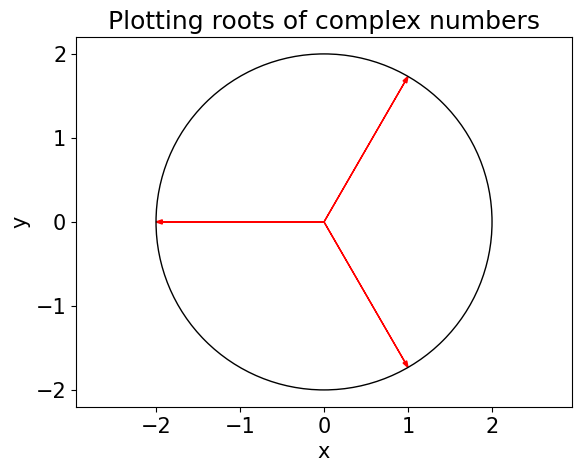

In [46]:
# function for plotting arrows
def f(x1, y1):
    plt.arrow(0, 0, x1, y1, color='red', head_width=0.05, length_includes_head=True)

# set scale of the plot
plt.scatter([-2, 2], [-2,2],s=0)

# loop calling function f to plot arrows
for j in range(len(sol)):
    f(float(sol[j][0]), float(sol[j][1]))

plt.title('Plotting roots of complex numbers')

# make the size of x and y axes the same on the plot
plt.axis("equal")

# plot circle with radius R=2 centered at (0,0)
circle = plt.Circle((0,0), 2.0, fill=False)

# use patch library to plot the circle
plt.gca().add_patch(circle)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 6.6.2 Hyperbolic functions

### Example 6.12: General properties of hyperbolic functions

In [47]:
from sympy import symbols, diff, sinh, cosh, simplify, integrate
x = symbols('x', real=True)

print("cosh(x)**2-sinh(x)**2 = ", simplify(cosh(x)**2-sinh(x)**2)) 

cosh(x)**2-sinh(x)**2 =  1


In [49]:
print(simplify(diff(cosh(x),x)))

sinh(x)


## 6.7 Complex vectors

In [51]:
import numpy as np
from sympy import I, sqrt

chi = np.array([1-I,-2*I])
chi_star = np.conjugate(chi)

# find the norm using the dot product of chi and chi_star
norm_const = sqrt(np.dot(chi, chi_star).simplify())
print(norm_const)

sqrt(6)


In [52]:
norm_chi = chi/norm_const
p_up = np.dot(np.conjugate(norm_chi)[0], norm_chi[0])
print(p_up.simplify())

1/3
